In [1]:
# This notebook is for playing with fixed density/pressure/temperature models.

In [2]:
# This cell sets the working directory so that the code will work on the cloud as well.

import os
cur_dir = os.getcwd()
if cur_dir.split('/')[-1] == "test":
    os.chdir('./..')

In [3]:
import numpy as np
import random
from matplotlib               import pyplot as plt
from matplotlib.pyplot        import figure, legend

import lib.temperature as temperature
import lib.mc_density  as mc_density
import lib.mc_interior as mc_interior
import lib.allona      as allona
import lib.constants   as constants
import lib.profile     as profile

In [21]:
def load_pm_format_csv(filename, debug=False):
    # Load raw data
    aa = [x.strip("\n").split(',') for x in open(filename).readlines()][1:]
    raw = [[float(x) for x in y] for y in aa]
    
    # Create input arrays.
    radius = np.array(list(reversed([x[0] for x in raw])))
    rho = np.array(list(reversed([x[1] for x in raw])))
    temp = np.array(list(reversed([x[3] for x in raw])))
    pressure = np.array(list(reversed([x[2] for x in raw])))
    
    
    # Density model
    model = mc_density.MCDensity(radius, rho)
    if debug:
        plt.plot(radius, pressure, label="input_pressure")
        model.plot_pressure()    
    # Test:
    print ("mass of model is %s"%model.get_mass())
    
    # Compute composition from temperature
    catalog = temperature.iron_sio2_water_eos_env_catalog()
    composition = []
    for t,r,p  in zip(temp, model.get_densities(), model.get_pressure()):
        c= catalog.get_composition(t,r,p)
        composition.append(c)
        mix = np.array([catalog.composition_to_mix(x) for x in composition])

    # Interior model
    planet = mc_interior.MCInterior(radius, rho, mix, catalog)
    
    if debug:
        figure()
        plt.plot(radius, temp, label="input temp")
        planet.plot_temp()    
    
    return planet

mass of model is 8.735819462194683e+28


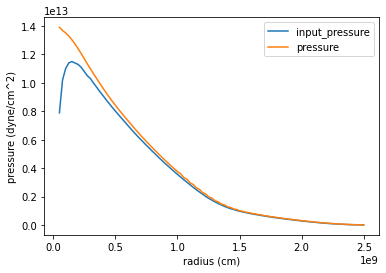

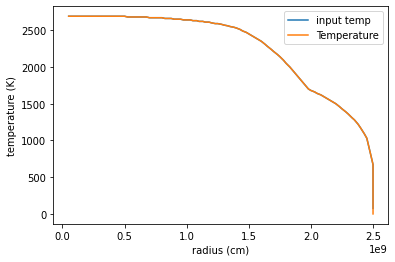

In [22]:
planet = load_pm_format_csv("from_csv/seed255.csv", debug=True)

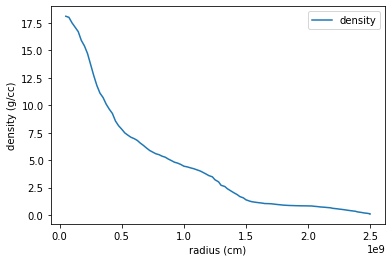

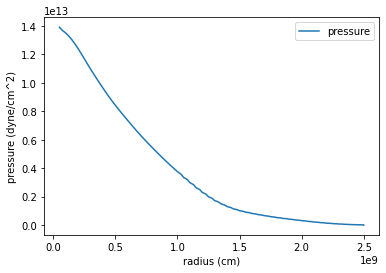

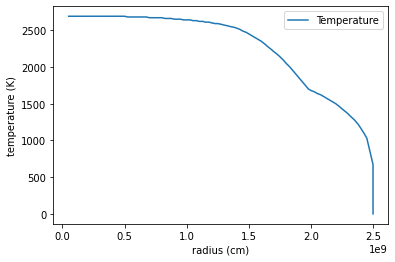

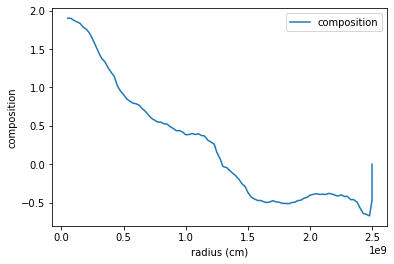

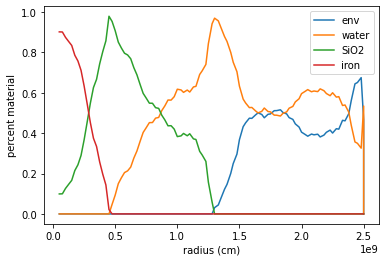

In [23]:
planet.plot_densities()
figure()
planet.plot_pressure()
figure()

planet.plot_temp()
figure()
planet.plot_composition()
figure()
planet.plot_mix()

In [24]:
print("env   mass: %s"%planet.get_mix_mass("env"))
print("water mass: %s"%planet.get_mix_mass("water"))
print("SiO2  mass: %s"%planet.get_mix_mass("SiO2"))
print("iron  mass: %s"%planet.get_mix_mass("iron"))
planet.get_mix_ratios()

env   mass: 1.7181526164172923e+28
water mass: 4.82492421982345e+28
SiO2  mass: 2.0363401195932035e+28
iron  mass: 1.5640250636073707e+27


[0.2, 0.55, 0.23, 0.02]

In [25]:
planet.get_composition()

[1.9011022047844923,
 1.9005029392285178,
 1.873961759015733,
 1.8537634527485767,
 1.8339000212682512,
 1.7853504262005349,
 1.7568147468279114,
 1.710760612794621,
 1.632791354695522,
 1.5433342696113561,
 1.4519276070488454,
 1.3746126477119813,
 1.3336175736992766,
 1.2572778540983804,
 1.1964353703159594,
 1.1434209537311228,
 1.0215365228562534,
 0.9526885920956004,
 0.9067441578662477,
 0.8503573717410443,
 0.8210295840895996,
 0.7953806348471659,
 0.786849509961165,
 0.7680184129384677,
 0.7239150722191993,
 0.688467895572493,
 0.641610908241288,
 0.5968616402463405,
 0.5729450728612985,
 0.5481591856212157,
 0.5477243626068685,
 0.5259314966908456,
 0.5223934771072211,
 0.48851906641846404,
 0.4648977872694862,
 0.436248429555718,
 0.43657867473919104,
 0.41975483254925466,
 0.3827166527948621,
 0.38626977707447,
 0.39837286437025,
 0.3868661083419279,
 0.39670487663409176,
 0.371507448020784,
 0.36843450199040134,
 0.30983789023117697,
 0.29182819791620046,
 0.259983510637013